In [88]:
import warnings
warnings.filterwarnings('ignore')

In [90]:
from matplotlib import rcParams
rcParams['font.family'] = 'Gulim'
rcParams['axes.unicode_minus'] = False 

# Sales Dataset

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('./walmart.csv')
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [8]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [6]:
df.select_dtypes(include='number')

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
0,1000001,10,0,3,8370
1,1000001,10,0,1,15200
2,1000001,10,0,12,1422
3,1000001,10,0,12,1057
4,1000002,16,0,8,7969
...,...,...,...,...,...
550063,1006033,13,1,20,368
550064,1006035,1,0,20,371
550065,1006036,15,1,20,137
550066,1006038,1,0,20,365


### 구매금액 합계 Top 10 고객

In [12]:
top_sum=df.groupby('User_ID')['Purchase'].sum().sort_values(ascending=False).head(10)
top_sum

User_ID
1004277    10536909
1001680     8699596
1002909     7577756
1001941     6817493
1000424     6573609
1004448     6566245
1005831     6512433
1001015     6511314
1003391     6477160
1001181     6387961
Name: Purchase, dtype: int64

### 구매금액 평균 Top10 고객

In [14]:
top_avg=df.groupby('User_ID')['Purchase'].mean().sort_values(ascending=False).head(10)
top_avg

User_ID
1003902    18577.893617
1005069    18490.166667
1005999    18345.944444
1001349    18162.739130
1003461    17508.700000
1000101    17246.439394
1002983    16790.612903
1005994    16787.071429
1000592    16776.571429
1004474    16639.941176
Name: Purchase, dtype: float64

### 구매 항목 개수 Top10 고객

In [16]:
top_count=df.groupby('User_ID')['Purchase'].count().sort_values(ascending=False).head(10)
top_count

User_ID
1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
1003618     767
1001150     752
1001015     740
1005795     729
1005831     727
Name: Purchase, dtype: int64

### VIP 고객 수 추출(중복포함)

In [18]:
vip_id=set(top_sum.index) | set(top_avg.index) |set(top_count.index)
len(vip_id)

24

### VIP 고객 특성 

In [20]:
vip_df=df[df['User_ID'].isin(vip_id)]
vip_df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
547,1000101,P00278042,F,18-25,3,A,1,0,1,19464
548,1000101,P00154042,F,18-25,3,A,1,0,1,19027
549,1000101,P00014042,F,18-25,3,A,1,0,1,19394
550,1000101,P00262242,F,18-25,3,A,1,0,1,15871
2619,1000424,P00246142,M,26-35,17,A,3,0,1,15802
...,...,...,...,...,...,...,...,...,...,...
548573,1003902,P00370853,M,26-35,5,C,2,0,19,38
548828,1004277,P00371644,M,36-45,16,A,0,0,20,126
548947,1004448,P00375436,M,26-35,14,A,0,0,20,367
549401,1005069,P00372445,F,55+,0,C,3,1,20,597


In [31]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

### 성별,연령,직업,지역,결혼여부,구매품목별 분포 확인(주의)

In [ ]:
vip_df['Gender'].value_counts()  #성별
vip_df['Age'].describe()         #연령
vip_df['Marital_Status'].value_counts() #결혼여부


Marital_Status
0    6365
1    4966
Name: count, dtype: int64

### 직업(Occupation) 데이터 형식이 맞지않음

In [26]:
vip_df['Occupation'].value_counts()

Occupation
20    2601
17    2359
7     1620
1     1516
16     979
3      806
4      729
14     575
5       94
0       52
Name: count, dtype: int64

In [34]:
df['Occupation'].unique()   #직업이 21개의 항목이 있다는 것을 확인함

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

In [99]:
occupation_map={    
    0: "학생",
    1: "회사원",
    2: "프리랜서",
    3: "공무원",
    4: "농림어업",
    5: "서비스직",
    6: "전문직",
    7: "주부",
    8: "기타",
    9: "교육직",
    10: "기술직",
    11: "연구직",
    12: "의료직",
    13: "자영업",
    14: "경영자",
    15: "영업직",
    16: "군인",
    17: "예술가",
    18: "운전/운수업",
    19: "무직/은퇴",
    20: "사업가"
    }

In [100]:
df['Occupation']=df['Occupation'].map(occupation_map)

In [101]:
df['Occupation'].unique()  #데이터 타입 정정 완료

array(['기술직', '군인', '영업직', '주부', '사업가', '교육직', '회사원', '의료직', '예술가', '학생',
       '공무원', '농림어업', '연구직', '기타', '무직/은퇴', '프리랜서', '운전/운수업', '서비스직',
       '경영자', '자영업', '전문직'], dtype=object)

In [47]:
df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,기술직,A,2,0,3,8370
1,1000001,P00248942,F,0-17,기술직,A,2,0,1,15200
2,1000001,P00087842,F,0-17,기술직,A,2,0,12,1422
3,1000001,P00085442,F,0-17,기술직,A,2,0,12,1057
4,1000002,P00285442,M,55+,군인,C,4+,0,8,7969


In [102]:
df['Occupation'].value_counts().sort_index()  #항목별 건수보기

Occupation
경영자       27309
공무원       17650
교육직        6291
군인        25371
기술직       12930
기타         1546
농림어업      72308
무직/은퇴      8461
사업가       33562
서비스직      12177
연구직       11586
영업직       12165
예술가       40043
운전/운수업     6622
의료직       31179
자영업        7728
전문직       20355
주부        59133
프리랜서      26588
학생        69638
회사원       47426
Name: count, dtype: int64

### 제품 카테고리(Product_Category) 데이터 형식이 맞지않음

In [103]:
df['Product_Category'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19])

In [104]:
product_category_map={  
    1: "식품",
    2: "음료",
    3: "가전제품",
    4: "가구",
    5: "패션/의류",
    6: "화장품/뷰티",
    7: "스포츠/레저",
    8: "도서/문구",
    9: "유아/아동",
    10: "반려동물",
    11: "여행/레저",
    12: "건강/의료",
    13: "자동차/용품",
    14: "주방/생활용품",
    15: "컴퓨터/IT",
    16: "악기/취미",
    17: "모바일/통신",
    18: "악세서리/잡화",
    19: "공구/산업용품",
    20: "기타"
    }

In [51]:
df['Product_Category']=df['Product_Category'].map(product_category_map)
df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,기술직,A,2,0,가전제품,8370
1,1000001,P00248942,F,0-17,기술직,A,2,0,식품,15200
2,1000001,P00087842,F,0-17,기술직,A,2,0,건강/의료,1422
3,1000001,P00085442,F,0-17,기술직,A,2,0,건강/의료,1057
4,1000002,P00285442,M,55+,군인,C,4+,0,도서/문구,7969


In [61]:
df['Product_Category'].unique()  #데이터 타입 변경완료.

array(['가전제품', '식품', '건강/의료', '도서/문구', '패션/의류', '가구', '음료', '화장품/뷰티',
       '주방/생활용품', '여행/레저', '자동차/용품', '컴퓨터/IT', '스포츠/레저', '악기/취미',
       '악세서리/잡화', '반려동물', '모바일/통신', '유아/아동', '기타', '공구/산업용품'],
      dtype=object)

### 나이(Age)가 구체화 되어있지 않으므로 전처리 필요

In [67]:
df['Age'] = df['Age'].apply(lambda x: int(str(x).replace('+','')) 
        if '+' in str(x) 
        else sum(map(int, str(x).split('-')))/len(str(x).split('-')) 
        if '-' in str(x) 
        else int(x))
df['Age'].unique()

array([ 8, 55, 30, 48, 53, 40, 21])

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,8,기술직,A,2,0,가전제품,8370
1,1000001,P00248942,F,8,기술직,A,2,0,식품,15200
2,1000001,P00087842,F,8,기술직,A,2,0,건강/의료,1422
3,1000001,P00085442,F,8,기술직,A,2,0,건강/의료,1057
4,1000002,P00285442,M,55,군인,C,4+,0,도서/문구,7969


### 나이가 20살 이하는 학생이어야 함

In [70]:
student_code=0

df.loc[df['Age']<20, 'Occupation']=student_code

if 'Occupation' in df.columns:
    df.loc[df['Age']<20, 'Occupation']='학생'

In [73]:
students=df[df['Age']<=20][['Age','Occupation']]
students   #전처리 완료

,Age,Occupation
0,8,학생
1,8,학생
2,8,학생
3,8,학생
85,8,학생
...,...,...
549904,8,학생
550012,8,학생
550024,8,학생
550035,8,학생


In [74]:
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,8,학생,A,2,0,가전제품,8370
1,1000001,P00248942,F,8,학생,A,2,0,식품,15200
2,1000001,P00087842,F,8,학생,A,2,0,건강/의료,1422
3,1000001,P00085442,F,8,학생,A,2,0,건강/의료,1057
4,1000002,P00285442,M,55,군인,C,4+,0,도서/문구,7969
5,1000003,P00193542,M,30,영업직,A,3,0,식품,15227
6,1000004,P00184942,M,48,주부,B,2,1,식품,19215
7,1000004,P00346142,M,48,주부,B,2,1,식품,15854
8,1000004,P0097242,M,48,주부,B,2,1,식품,15686
9,1000005,P00274942,M,30,농림어업,A,1,1,도서/문구,7871


### VIP 고객별로 구매 품목 상위 3개만 추출하여 맞춤 프로모션을 추천

In [109]:
#vip고객 데이터만 필터링
vip_df=df[df['User_ID'].isin(vip_id)]   

#vip별 품목 구매 건수 집계
purchase_count=vip_df.groupby(['User_ID','Product_Category']).size().reset_index(name='purchase_count')

#vip별 상위3개 품목만 뽑기
top3 = purchase_count.sort_values(['User_ID', 'purchase_count'], ascending=[True, False]) \
    .groupby('User_ID').head(3)
    


### VIP별 Top3 품목 목록

In [108]:

for vip in top3['User_ID'].unique():
    items = top3[top3['User_ID'] == vip]['Product_Category'].tolist()
    print(f"VIP 고객 {vip}의 추천 프로모션 품목 Top3: {items}")

VIP 고객 1000101의 추천 프로모션 품목 Top3: ['식품', '패션/의류', '가구']
VIP 고객 1000424의 추천 프로모션 품목 Top3: ['패션/의류', '식품', '도서/문구']
VIP 고객 1000592의 추천 프로모션 품목 Top3: ['식품', '화장품/뷰티', '음료']
VIP 고객 1000889의 추천 프로모션 품목 Top3: ['도서/문구', '패션/의류', '식품']
VIP 고객 1001015의 추천 프로모션 품목 Top3: ['도서/문구', '패션/의류', '식품']
VIP 고객 1001150의 추천 프로모션 품목 Top3: ['패션/의류', '도서/문구', '식품']
VIP 고객 1001181의 추천 프로모션 품목 Top3: ['패션/의류', '도서/문구', '식품']
VIP 고객 1001349의 추천 프로모션 품목 Top3: ['식품']
VIP 고객 1001680의 추천 프로모션 품목 Top3: ['패션/의류', '도서/문구', '식품']
VIP 고객 1001941의 추천 프로모션 품목 Top3: ['패션/의류', '식품', '도서/문구']
VIP 고객 1002909의 추천 프로모션 품목 Top3: ['식품', '패션/의류', '도서/문구']
VIP 고객 1002983의 추천 프로모션 품목 Top3: ['식품', '공구/산업용품']
VIP 고객 1003391의 추천 프로모션 품목 Top3: ['패션/의류', '도서/문구', '식품']
VIP 고객 1003461의 추천 프로모션 품목 Top3: ['식품', '패션/의류', '화장품/뷰티']
VIP 고객 1003618의 추천 프로모션 품목 Top3: ['도서/문구', '식품', '패션/의류']
VIP 고객 1003902의 추천 프로모션 품목 Top3: ['식품', '음료', '가구']
VIP 고객 1004277의 추천 프로모션 품목 Top3: ['도서/문구', '식품', '패션/의류']
VIP 고객 1004448의 추천 프로모션 품목 Top3: ['식품', '패션/의류', 

In [84]:
import matplotlib.font_manager as fm
for i in fm.fontManager.ttflist:
    if i.name.find('Gulim') !=-1:
        print(i.name)

Gulim
New Gulim


# Vip 고객의 연령대 분포를 통해  vip 마케팅 타깃 연령층 파악

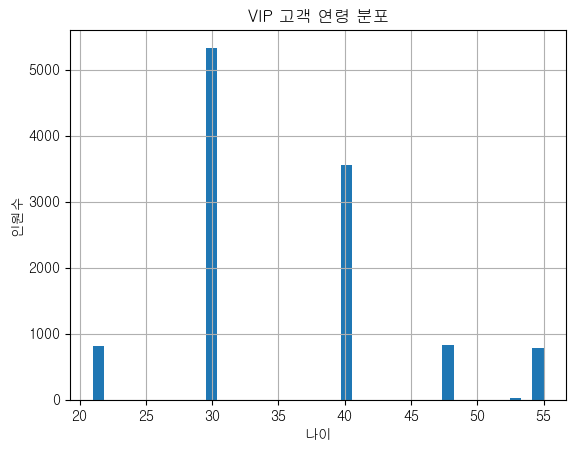

In [97]:
import matplotlib.pyplot as plt

vip_df['Age'].hist(bins=40)
plt.title('VIP 고객 연령 분포')
plt.xlabel('나이')
plt.ylabel('인원수')
plt.show()

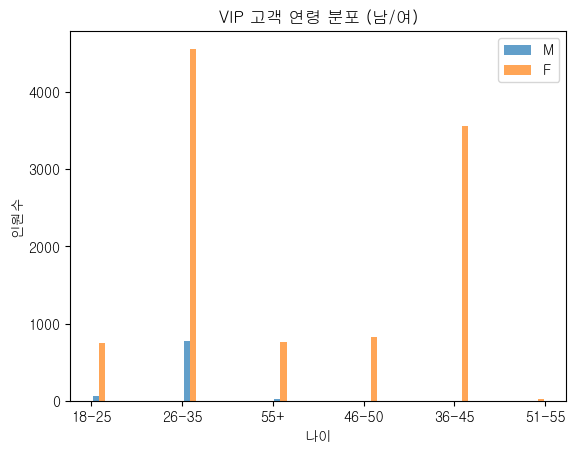

In [114]:
# 남/여 데이터 분할
male_vip = vip_df[vip_df['Gender'] == 'M']['Age']
female_vip = vip_df[vip_df['Gender'] == 'F']['Age']

plt.hist([ female_vip,male_vip], bins=30, label=['M', 'F'], alpha=0.7)
plt.title('VIP 고객 연령 분포 (남/여)')
plt.xlabel('나이')
plt.ylabel('인원수')
plt.legend()
plt.show()

# VIP별 구매품목 Top3 빈도 -> vip가 주로 구매하는 카테고리 파악, 맞춤 프로모션 방향제시

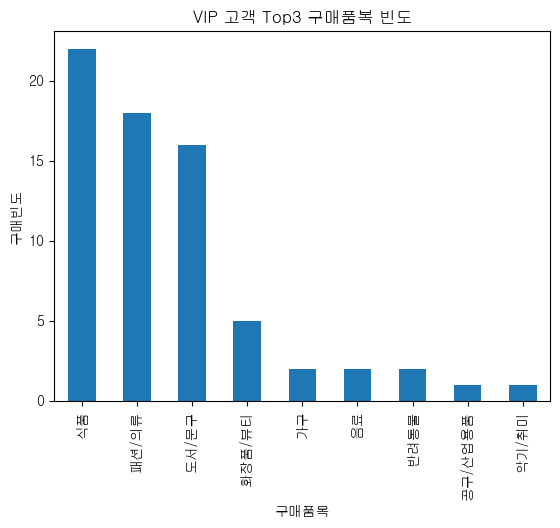

In [105]:
top3_items=top3['Product_Category'].value_counts()
top3_items.plot(kind='bar')
plt.title('VIP 고객 Top3 구매품복 빈도')
plt.xlabel('구매품목')
plt.ylabel('구매빈도')
plt.show()

# VIP 고객의 직업 분포
# → VIP 주요 직업군 파악 → 직업별 맞춤 제안

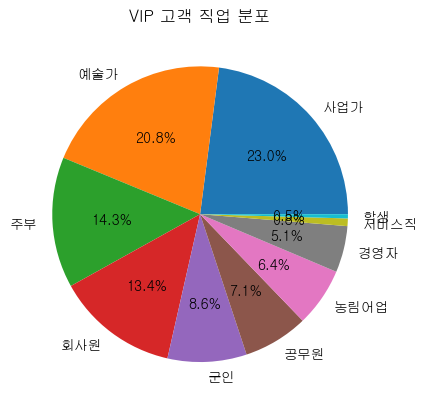

In [110]:
vip_df['Occupation'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('VIP 고객 직업 분포')
plt.ylabel('')
plt.show()